In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/diabetis_train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               537 non-null    int64  
 1   Glucose                   537 non-null    int64  
 2   BloodPressure             537 non-null    int64  
 3   SkinThickness             537 non-null    int64  
 4   Insulin                   537 non-null    int64  
 5   BMI                       537 non-null    float64
 6   DiabetesPedigreeFunction  537 non-null    float64
 7   Age                       537 non-null    int64  
 8   Outcome                   537 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 37.9 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86f9730710>,
      dtype=object)

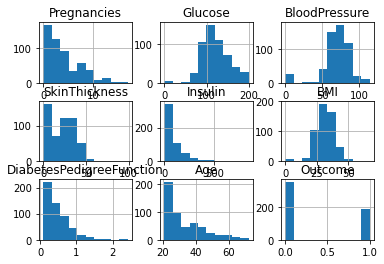

In [ ]:
df.hist()

In [ ]:
df.plot(figsize=(15,20))

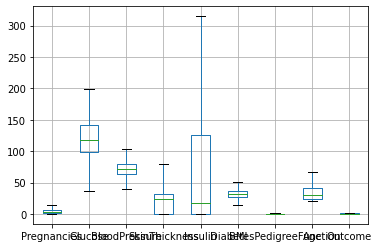

In [ ]:
df.boxplot()

In [ ]:
q1 = df['Pregnancies'].quantile(.25)
q3 = df['Pregnancies'].quantile(.75)
IQR = q3-q1
df['Pregnancies'] = np.clip(df['Pregnancies'],q1-1.5*IQR, q3+1.5*IQR)

q1 = df['Glucose'].quantile(.25)
q3 = df['Glucose'].quantile(.75)
IQR = q3-q1
df['Glucose'] = np.clip(df['Glucose'],q1-1.5*IQR, q3+1.5*IQR)

q1 = df['BloodPressure'].quantile(.25)
q3 = df['BloodPressure'].quantile(.75)
IQR = q3-q1
df['BloodPressure'] = np.clip(df['BloodPressure'],q1-1.5*IQR, q3+1.5*IQR)

q1 = df['SkinThickness'].quantile(.25)
q3 = df['SkinThickness'].quantile(.75)
IQR = q3-q1
df['SkinThickness'] = np.clip(df['SkinThickness'],q1-1.5*IQR, q3+1.5*IQR)

q1 = df['Insulin'].quantile(.25)
q3 = df['Insulin'].quantile(.75)
IQR = q3-q1
df['Insulin'] = np.clip(df['Insulin'],q1-1.5*IQR, q3+1.5*IQR)

q1 = df['DiabetesPedigreeFunction'].quantile(.25)
q3 = df['DiabetesPedigreeFunction'].quantile(.75)
IQR = q3-q1
df['DiabetesPedigreeFunction'] = np.clip(df['DiabetesPedigreeFunction'],q1-1.5*IQR, q3+1.5*IQR)

q1 = df['Age'].quantile(.25)
q3 = df['Age'].quantile(.75)
IQR = q3-q1
df['Age'] = np.clip(df['Age'],q1-1.5*IQR, q3+1.5*IQR)

In [ ]:
q1 = df['BMI'].quantile(.25)
q3 = df['BMI'].quantile(.75)
IQR = q3-q1
df['BMI'] = np.clip(df['BMI'],q1-1.5*IQR, q3+1.5*IQR)

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.124830,0.180499,-0.079819,-0.076786,0.018209,-0.049143,0.537133,0.212701
Glucose,0.124830,1.000000,0.220048,0.051623,0.297680,0.234641,0.117208,0.282203,0.460989
BloodPressure,0.180499,0.220048,1.000000,0.124942,0.035046,0.253046,0.039265,0.326439,0.137608
SkinThickness,-0.079819,0.051623,0.124942,1.000000,0.466460,0.376175,0.206556,-0.090168,0.062810
Insulin,-0.076786,0.297680,0.035046,0.466460,1.000000,0.159584,0.212555,-0.043763,0.110514
BMI,0.018209,0.234641,0.253046,0.376175,0.159584,1.000000,0.170167,0.079464,0.325968
DiabetesPedigreeFunction,-0.049143,0.117208,0.039265,0.206556,0.212555,0.170167,1.000000,0.066472,0.183922
Age,0.537133,0.282203,0.326439,-0.090168,-0.043763,0.079464,0.066472,1.000000,0.246592
Outcome,0.212701,0.460989,0.137608,0.062810,0.110514,0.325968,0.183922,0.246592,1.000000


In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4.0,110,92,0,0,37.6,0.191,30.0,0
1,3.0,74,68,28,45,29.7,0.293,23.0,0
2,6.0,134,80,37,315,46.2,0.238,46.0,1
3,4.0,117,62,12,0,29.7,0.380,30.0,1
4,7.0,129,68,49,125,38.5,0.439,43.0,1


In [ ]:
X_train= df.drop(['Outcome'], axis=1)
y_train=df['Outcome']

In [ ]:
df_test= pd.read_csv('/content/drive/MyDrive/diabetis_test.csv')

In [ ]:
X_test= df_test.drop(['Outcome'], axis=1)
y_test=df_test['Outcome']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,StratifiedKFold
cv = StratifiedKFold(10)
model_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
model_dt = DecisionTreeClassifier()
score=cross_val_score(model_rf, X_train, y_train, cv=cv)
print(f'score of random forest classifier:{score.mean()}')
score=cross_val_score(model_dt, X_train, y_train, cv=cv)
print(f'score of decision tree classifier:{score.mean()}')

score of random forest classifier:0.7617749825296994
score of decision tree classifier:0.6853249475890985


In [ ]:
from sklearn.model_selection import GridSearchCV
model_params = {'n_estimators':np.arange(50,100), 'random_state':[42]}
model_cv = GridSearchCV(model_rf,model_params,cv=5,n_jobs=-1,verbose=True,return_train_score = True,scoring = 'recall')
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oo...
                                              random_state=None,